In [174]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [175]:
from mgcpy import RVCorr, HHG
from mgcpy.benchmarks.power import power
from mgcpy.benchmarks.simulations import linear_sim, quad_sim, ubern_sim, exp_sim, w_sim, joint_sim, spiral_sim

## Test Statistic

In [176]:
def test_stats_vs_dimension(corr_type, simulation_type, dim_range):
    test_stats = []
    for d in range(1, dim_range+1):
        x, y = simulation_type(num_samp=100, num_dim=d, noise=0)
        if corr_type == 'rv' or corr_type == 'cca':
            corr = RVCorr(which_test=corr_type)
        #else:
            #corr = HHG()
        test_stats.append(corr.test_statistic(x, y)[0])
    return test_stats

In [177]:
def plot_test_stats(simulation_type, dim_range, simulation_name):
    rv_test_stats = test_stats_vs_dimension('rv', simulation_type, dim_range)
    cca_test_stats = test_stats_vs_dimension('cca', simulation_type, dim_range)
    #hhg_test_stats = test_stats_vs_dimension('hhg', simulation_type, dim_range) 
    plt.plot(rv_test_stats, label='RV')
    plt.plot(cca_test_stats, label='CCA')
    #plt.plot(hhg_test_stats, label='HHG')
    plt.xlabel('Dimensions')
    plt.ylabel('Test Statistics')
    plt.legend()
    plt.gca().set_xlim(1, dim_range+1)
    plt.xticks(np.arange(0, dim_range+1, 5))
    plt.title('Test Statistics \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

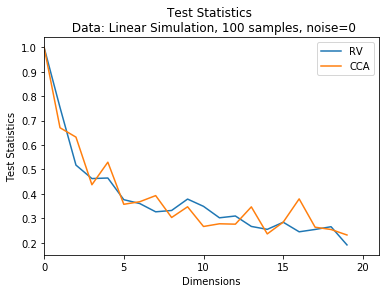

In [178]:
plot_test_stats(linear_sim, 20, 'Linear')

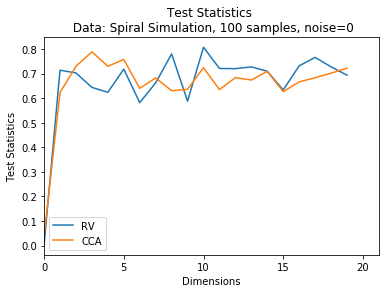

In [179]:
plot_test_stats(spiral_sim, 20, 'Spiral')

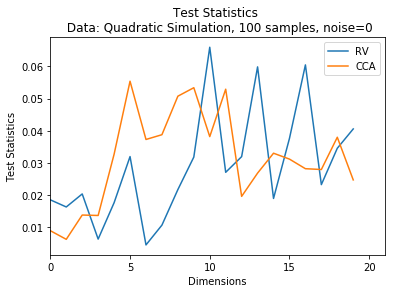

In [180]:
plot_test_stats(quad_sim, 20, 'Quadratic')

## P-value

In [184]:
def pvalue_vs_dimension(corr_type, simulation_type, dim_range):
    p_value = []
    for d in range(1, dim_range+1):
        x, y = simulation_type(num_samp=100, num_dim=d, noise=0)
        if corr_type == 'rv' or corr_type == 'cca':
            corr = RVCorr(which_test=corr_type)
        #else:
            #corr = HHG()
        p_value.append(corr.p_value(x, y)[0])
    return p_value

In [185]:
def plot_p_value(simulation_type, dim_range, simulation_name):
    rv_pvalue = pvalue_vs_dimension('rv', simulation_type, dim_range)
    cca_pvalue = pvalue_vs_dimension('cca', simulation_type, dim_range)
    #hhg_pvalue = pvalue_vs_dimension('hhg', simulation_type, dim_range)
    plt.plot(rv_pvalue, label='RV')
    plt.plot(cca_pvalue, label='CCA')
    #plt.plot(hhg_pvalue, label='HHG')
    plt.xlabel('Dimensions')
    plt.ylabel('pvalue')
    plt.legend()
    plt.gca().set_xlim(1, dim_range+1)
    plt.xticks(np.arange(0, dim_range+1, 5))
    plt.title('P-value \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

TypeError: float() argument must be a string or a number, not 'dict'

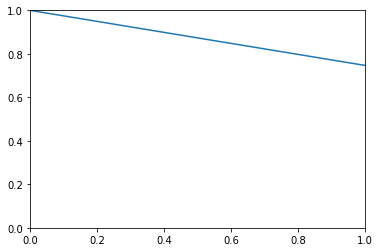

In [186]:
plot_p_value(linear_sim, 20, 'Linear')